In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

news_data = pd.read_csv("data/abcnews-date-text.csv")
news_data['year'] = news_data['publish_date'].apply(lambda x: str(x)[0:4]).astype(int)

talk_data = pd.read_csv("data/TED_Talks_by_ID.csv", sep = '\t')
talk_data = talk_data.rename(columns = {'year_filmed':'year'})

In [4]:
# Find the unique tags - this is just useful to help me pick the right ones

unique_tags = [row['tags'].split(',') for ind, row in talk_data.iterrows()]

def strip_space(astring):
    try:
        if astring[0] == ' ':
            return astring[1:]
        else:
            return astring
    except IndexError:
        return astring
    
unique_tags = pd.unique(pd.Series([strip_space(tag) for l in unique_tags for tag in l]).sort_values())
print(unique_tags)

['' '3D printing' 'AI' 'AIDS' 'Addiction' 'Africa' "Alzheimer's"
 'Anthropocene' 'Asia' 'Autism spectrum disorder' 'Beauty' 'Biodiversity'
 'Biology' 'Biomechanics' 'Biosphere' 'Botany' 'Brand' 'Brazil' 'Buddhism'
 'CRISPR' 'Christianity' 'Communication' 'Community' 'DNA' 'Debate'
 'Ecology' 'Egypt' 'Environment' 'Europe' 'Foreign Policy'
 'Gender spectrum' 'God' 'Google' 'Green' 'HIV' 'Identity' 'Internet'
 'Iran' 'Islam' 'LGBT' 'Language' 'Latin America' 'Life' 'MacArthur grant'
 'Mars' 'Middle East' 'Moon' 'NASA' 'Nature' 'New York' 'Nobel Prize'
 'One Laptop Per Child' 'PTSD' 'Planets' 'Plants' 'Science' 'Senses'
 'Slavery' 'South America' 'String theory' 'Surgery' 'Surveillance'
 'Syria' 'TED Books' 'TED Brain Trust' 'TED Fellows' 'TED Prize'
 'TED Residency' 'TED en Español' 'TED en espanol' 'TED prize'
 'TED residency' 'TED-Ed' 'TEDMED' 'TEDYouth' 'TEDx' 'Transgender' 'Trees'
 'United States' 'Vaccines' 'Wikipedia' 'activism' 'addiction' 'adventure'
 'advertising' 'africa' 'agin

In [5]:
# Set global keywords
keywords = ['math', 'data', 'statistic']

for kw in keywords:
    kw_spaced = ' ' + kw
    kw_commad = ',' + kw
    print(kw_spaced, kw_commad)
    news_data[kw] = news_data['headline_text'].str.contains(kw_spaced)
    talk_data[kw] = talk_data['tags'].str.contains(kw_spaced) | talk_data['tags'].str.contains(',' + kw)
    
news_data['source'] = 'News Headlines'
talk_data['source'] = 'Ted Talks'
keywords.extend(['year', 'source'])
news_data = news_data[keywords]
talk_data = talk_data[keywords]
talk_data = talk_data.loc[talk_data['year'].astype(int) > 2002]


 math ,math
 data ,data
 statistic ,statistic


In [6]:
all_data = pd.concat([news_data, talk_data], axis = 0)
all_data = all_data.melt(id_vars = ['year', 'source'], var_name = 'Word', value_name = 'Frequency')
all_data = all_data.rename(columns = {'year':'Year', 'source':'Source'})


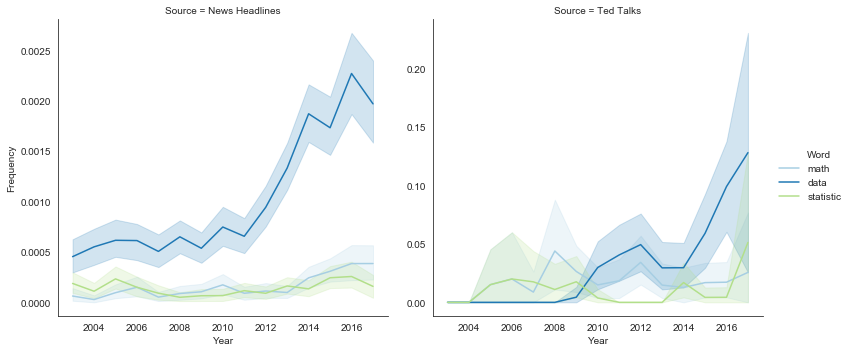

In [7]:
# First plot with both
sns.set_style("white")
plot = sns.relplot(x = 'Year', y = 'Frequency', hue = 'Word', col = 'Source', 
                   facet_kws = {'sharex':True, 'sharey':False},
                   palette = 'Paired', kind = 'line', data = all_data)

fig = plot.fig
fig.set_size_inches(12, 5)
#fig.savefig("frequencies.png", dpi = 1000, bbox_inches='tight')


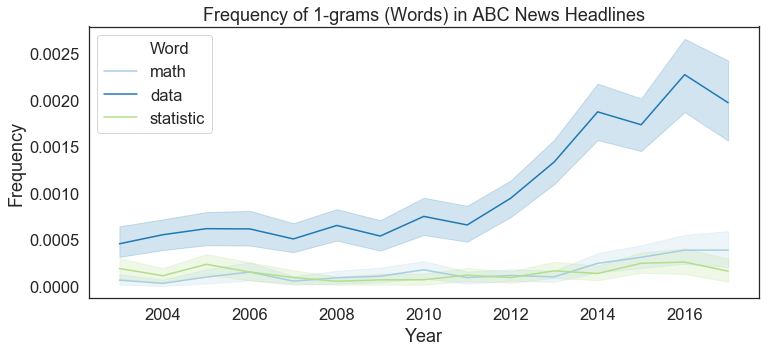

In [8]:
# Second plot with just news data
sns.set(style = 'white', font_scale = 1.5)
headlines = all_data.loc[all_data['Source'] == 'News Headlines']

plot = sns.lineplot(x = 'Year', y = 'Frequency', hue = 'Word',
                   palette = 'Paired', data = headlines)
plot.set(title = 'Frequency of 1-grams (Words) in ABC News Headlines')

fig = plot.get_figure()
fig.set_size_inches(12, 5)
fig.savefig("frequencies-v2.svg", bbox_inches='tight')